<a href="https://colab.research.google.com/github/sukeerthilangu08/drug-solubility-ml-model/blob/main/first_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



##MY FIRST ML MODEL##




## Requirements:
# 1)Methods : linear regression
# 2)pandas lib
# 3)data set for linear Regression : https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv


## Load Data


In [35]:
#Step 1 : import a library of python Pandas

import pandas as pd

# step 2 : putting the data we have into the data frame using python library

dataframe = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')
dataframe

# to make prediction of y = "logS" we take x =" MolLogP	MolWt	NumRotatableBonds	AromaticProportion" as parameters its like this "y = f(x)"

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


#Data Preperation

## Data seperation as X and Y


In [36]:
y = dataframe['logS']
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [37]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             1144 non-null   float64
 1   MolWt               1144 non-null   float64
 2   NumRotatableBonds   1144 non-null   float64
 3   AromaticProportion  1144 non-null   float64
 4   logS                1144 non-null   float64
dtypes: float64(5)
memory usage: 44.8 KB


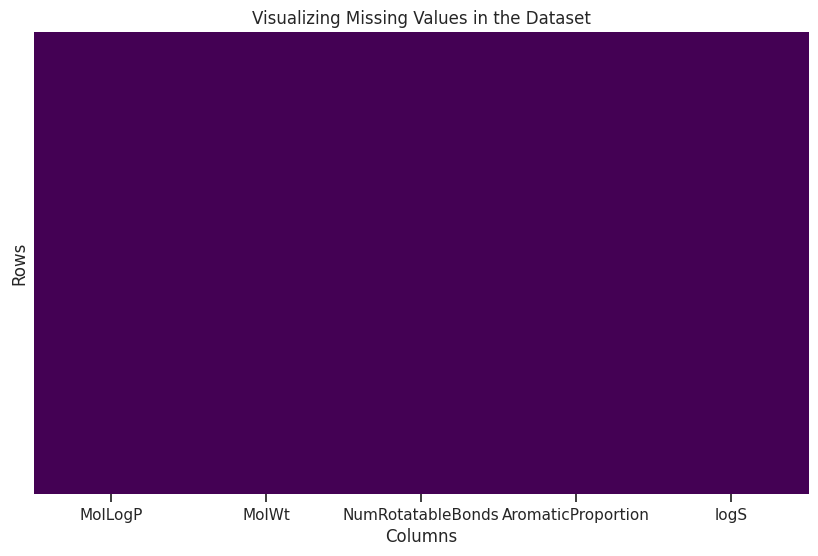

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the figure size for better readability
plt.figure(figsize=(10, 6))
# Create a heatmap to visualize missing values
# The yticklabels=False makes it cleaner for large datasets
sns.heatmap(dataframe.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Visualizing Missing Values in the Dataset')
plt.ylabel('Rows')
plt.xlabel('Columns')
plt.show()

In [39]:
dataframe.describe()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000
mean,2.449133,204.631675,2.173951,0.364932,-3.057997
std,1.866003,102.620500,2.627398,0.343305,2.096502
min,-7.571400,16.043000,0.000000,0.000000,-11.600000
25%,1.414900,122.126000,0.000000,0.000000,-4.332250
50%,2.340300,183.594500,1.000000,0.375000,-2.870500
75%,3.406475,270.715750,3.000000,0.666667,-1.600000
max,10.388600,780.949000,23.000000,1.000000,1.580000


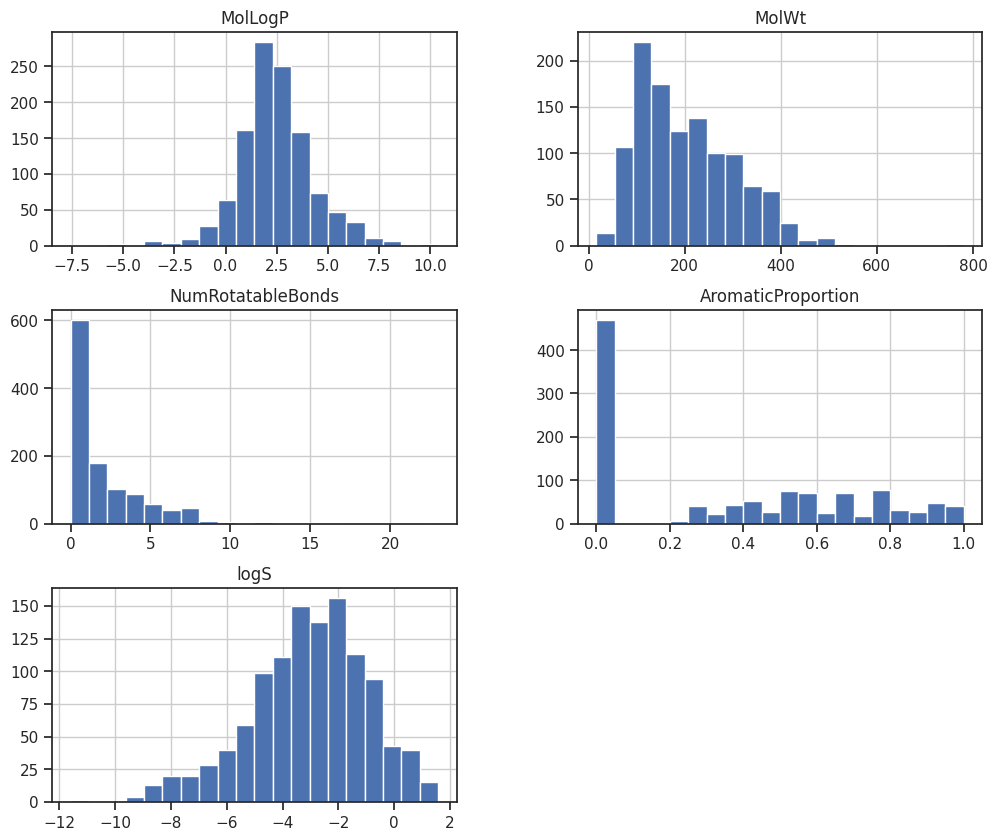

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style for the plots
sns.set(style='ticks')
# Create histograms for each numerical column
dataframe.hist(bins=20, figsize=(12, 10))
plt.show()

In [41]:
# 1 is for deleting row
# 0 is for deleting column
# 0 will not work in this case cause it is the oth row and that cant be deleted
x = dataframe.drop('logS', axis = 1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## Data Splitting


In [42]:
# we split a data set into training set and testing set which is usually 80 - 20

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)
# test_size
# 0.2 = 80-20
# 0.3 = 70-30

# random_state - randomness of splitting the data

In [43]:
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [44]:
x_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


# Model Building

## Linear Regression

### Traning a model

In [45]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### Applying the model to make predictions


In [46]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [47]:
y_lr_train_pred

array([-2.83668969,  0.84208401, -0.50930302, -0.13058053, -1.6269208 ,
       -2.86103037, -2.32208333, -4.16684323, -5.04235077, -2.29737009,
       -3.15082845, -4.33037208, -1.43700682, -2.59060064, -7.09025955,
       -2.32734557, -4.19073421, -2.63904005, -3.58104074, -3.75929058,
       -2.5501665 , -3.26968347, -2.78911367, -2.69251051, -0.77437547,
       -6.61955792, -2.99084623, -2.36975061, -7.18167736, -1.52816491,
       -4.81736265, -0.86996608, -7.09025955, -1.87404275, -2.58013247,
       -4.80953284, -4.17454084, -1.95444152, -3.50503339, -2.7411418 ,
       -1.87131835, -2.45270806, -3.07252433, -1.48988982, -3.98778754,
       -1.35216679, -0.16932277, -6.05237002, -3.29550658,  0.30513174,
       -3.25501463, -5.31993586, -0.4733928 , -4.79180882, -5.82486323,
       -2.70343539, -3.70838271, -2.4987341 , -2.12301018, -3.11393974,
       -2.79842053, -1.38274662, -4.3267103 , -3.57778946, -3.42356884,
       -9.15826626, -6.52588866, -1.75832085, -4.97842312, -1.59

In [48]:
y_lr_test_pred

array([-3.05722870e+00, -7.77785827e+00, -2.55016650e+00, -2.01523582e+00,
       -2.06375990e+00, -9.99672215e-01, -5.94603364e-01, -5.53626003e-01,
       -5.72200956e+00, -3.94006681e+00, -3.95496755e+00, -2.29737009e+00,
       -1.48980354e+00, -1.48988982e+00, -4.64510806e+00, -1.90396018e+00,
       -1.51566313e+00, -3.16424605e+00, -3.70863920e+00, -5.58105660e+00,
       -3.25038467e+00, -5.04235077e+00, -5.69194881e+00, -2.14339849e+00,
       -4.35689341e+00, -5.03964756e+00, -3.10383618e+00, -4.40286964e+00,
       -4.21276272e+00,  5.56508349e-01, -1.45537678e+00, -4.41027396e+00,
       -2.59668773e+00, -1.53336276e+00, -5.55749874e-01, -1.67111795e+00,
       -2.78163675e+00, -3.15395565e+00, -5.27083361e+00, -1.75321446e+00,
       -1.53350725e+00, -2.01255666e+00, -6.57559167e+00, -7.89433046e+00,
       -5.76437127e+00, -4.16422068e+00, -3.43694663e+00,  1.43834212e+00,
       -1.12679105e-02, -2.34521849e+00, -1.86480046e+00, -5.03964756e+00,
        8.55886378e-01, -

### **Evaluate model performance**

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

#NOTE : when we evaluate the model both th eparameters must be sof same length

#using Linear Regression
#compare the existing trainig model and predicted trainind model
#these are for the training set
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

#doing the same for testing set
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [50]:
print("LR MSE train model : ",lr_train_mse)
print("LR R2 train model : ",lr_train_r2)
print("LR MSE test model : ",lr_test_mse)
print("LR R2 test model : ",lr_test_mse)

LR MSE train model :  1.0075362951093687
LR R2 train model :  0.7645051774663391
LR MSE test model :  1.0206953660861033
LR R2 test model :  1.0206953660861033


In [51]:
#more structured way
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
#lr_results

In [52]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

##Random Forest
#if the y is quantitative(real values) then we will build regression models
  #Regression models are designed to predict continuous values.
#if the y is catagorical then we will build classification models
  #the target variable is a category or class.
  #Classification models are designed to predict discrete labels or classes.

#random forest regression has a special feature to handle the NaN values which says the NaN values must go to either side of the tree(left or right) or goes to which ever samples has most samples

### Training the model

In [53]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 2, random_state = 100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### Applying the model to make predictions

In [54]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [55]:
print("Predicted Training model (Random Forest) : \n" , y_rf_train_pred)
print("Size of Predicted Training model : ",len(y_rf_train_pred))

Predicted Training model (Random Forest) : 
 [-4.44388581 -1.40132433 -1.41481453 -1.41481453 -1.44411435 -2.67492782
 -2.50755276 -3.95611327 -4.62529592 -2.27343298 -2.69241199 -4.5150244
 -1.41481453 -2.67492782 -7.14501987 -2.30422396 -4.0676017  -3.36086239
 -2.53282364 -4.5150244  -2.47178242 -4.0676017  -2.66143763 -1.42912192
 -1.2164651  -7.14501987 -2.67492782 -2.47178242 -7.14501987 -1.2164651
 -4.5150244  -1.2164651  -7.14501987 -1.41481453 -1.64246378 -4.5150244
 -4.5150244  -1.41481453 -2.71012897 -1.64246378 -2.42959807 -2.89446137
 -2.47178242 -1.24495146 -2.69241199 -1.2164651  -1.2164651  -4.65157679
 -2.6279475  -1.2164651  -1.79134844 -4.5150244  -1.2164651  -4.44388581
 -4.62529592 -4.0676017  -4.5150244  -2.66143763 -1.41481453 -4.0676017
 -2.67492782 -1.40132433 -3.32568382 -2.51725697 -4.44388581 -7.14501987
 -7.14501987 -1.44411435 -4.5150244  -1.42961706 -1.74496555 -2.67492782
 -1.2164651  -1.5451346  -1.44411435 -4.65157679 -4.0676017  -1.2164651
 -4.5150244

In [56]:
print("Predicted Testing model (Random Forest) : \n" , y_rf_test_pred)
print("Size of Predicted Testing model : ",len(y_rf_train_pred))

Predicted Testing model (Random Forest) : 
 [-3.97313718 -7.14501987 -2.47178242 -2.40196468 -1.44411435 -1.40132433
 -1.2164651  -1.41481453 -7.14501987 -4.5150244  -4.5150244  -2.27343298
 -1.83979246 -1.24495146 -4.5150244  -1.40132433 -1.24495146 -2.67492782
 -2.67492782 -4.65157679 -3.00915981 -4.62529592 -7.12312525 -2.47657839
 -4.5150244  -4.5150244  -4.5150244  -4.5150244  -4.44388581 -1.2164651
 -1.41481453 -2.67492782 -2.67492782 -1.42961706 -1.40132433 -2.27343298
 -2.0381419  -2.67492782 -4.5150244  -1.38740573 -1.2164651  -1.61447629
 -7.14501987 -7.14501987 -7.12312525 -4.42408609 -2.0381419  -1.41481453
 -1.41481453 -2.50541484 -1.83979246 -4.5150244  -1.2164651  -2.6279475
 -4.62529592 -1.42912192 -7.14501987 -1.2164651  -1.41481453 -4.62529592
 -1.62796649 -2.69241199 -2.67492782 -2.66143763 -1.2164651  -1.23077249
 -2.67492782 -4.00999869 -1.41481453 -4.21304824 -2.69241199 -1.2164651
 -4.5150244  -1.2164651  -4.5150244  -7.14501987 -1.41481453 -4.5150244
 -7.1450198

### Evaluate model performance

In [57]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [58]:
print("RF MSE train model : ",rf_train_mse)
print("RF R2 train model : ",rf_train_r2)
print("RF MSE test model : ",rf_test_mse)
print("RF R2 test model : ",rf_test_mse)

RF MSE train model :  1.028227802112806
RF R2 train model :  0.7596688824431413
RF MSE test model :  1.407688264904896
RF R2 test model :  1.407688264904896


In [59]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,1.028228,0.759669,1.407688,0.709223


## Model Comparission

In [60]:
df_model = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True)
df_model

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162
1,Random forest,1.028228,0.759669,1.407688,0.709223


# Data visualization of prediction results

Text(0.5, 0, 'Experimental LogS')

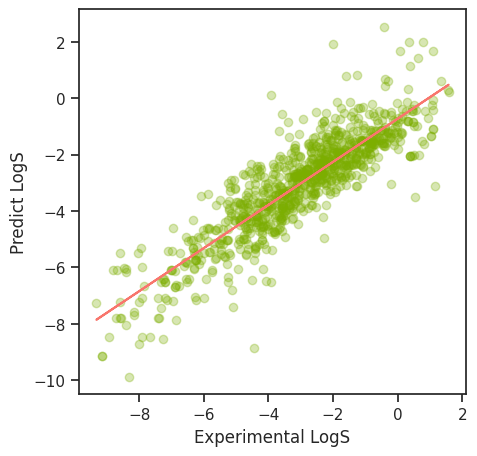

In [61]:

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')


In [68]:
# --- Step 1: Generate Predictions on the Test Data ---
y_lr_pred = lr.predict(x_test)
y_rf_pred = rf.predict(x_test)

# --- Step 2: Create the Results DataFrame ---
results_df = x_test.copy()
results_df['actual_logS'] = y_test
results_df['predicted_logS_lr'] = y_lr_pred
results_df['predicted_logS_rf'] = y_rf_pred

# --- Step 3: Verify and Save with Full Path ---
# Display the first few rows to verify the output
print(results_df.head())

# --- MODIFICATION IS HERE ---
# We are now providing the full, absolute path to ensure it saves in the correct place
full_path = '/content/drug_solubility_predictions.csv'
results_df.to_csv(full_path, index=False)

print(f"\nSuccessfully saved prediction results to '{full_path}'")

      MolLogP    MolWt  NumRotatableBonds  AromaticProportion  actual_logS  \
822   2.91000  172.268                7.0            0.000000        -3.38   
118   7.27400  360.882                1.0            0.666667        -8.01   
347   1.94040  145.161                0.0            0.909091        -2.16   
1123  1.98640  119.378                0.0            0.000000        -1.17   
924   1.70062  108.140                0.0            0.750000        -0.73   

      predicted_logS_lr  predicted_logS_rf  
822           -3.057229          -3.973137  
118           -7.777858          -7.145020  
347           -2.550166          -2.471782  
1123          -2.015236          -2.401965  
924           -2.063760          -1.444114  

Successfully saved prediction results to '/content/drug_solubility_predictions.csv'
